In [349]:
import pandas as pd
import numpy as np
import scipy
import heapq
import scipy.stats
import matplotlib.pyplot as plt

In [350]:
papers_filename = "/Users/jsennett/Code/top-k-insights/data/all-papers.csv"
p_df = pd.read_csv(papers_filename, encoding='mac_roman', dtype = {'school': str})
p_df.fillna('', inplace=True)
p_df['M'] = 1

In [351]:
print(len(p_df), "rows")
p_df.head()

2991406 rows


,paperid,venue_name,year,school,venue_type,M
0,5389,Future Generation Comp. Syst.,2004,,0,1
1,5390,Future Generation Comp. Syst.,2010,,0,1
2,5407,Future Generation Comp. Syst.,2009,,0,1
3,5414,Future Generation Comp. Syst.,2001,,0,1
4,5449,Future Generation Comp. Syst.,2004,,0,1


## Powerlaw maximum point
INFO:root: [1.0] Aggregating pct of count over school, maximum point 99.77 stood out using powerlaw test, considering only the subspace {}.


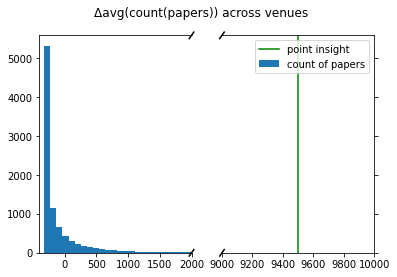

In [368]:
f1,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')
ax.hist(rs['delta_avg'], bins=1000, label='count of papers')
ax2.hist(rs['delta_avg'], bins=1000, label='count of papers')
ax.set_xlim(-400,2000)
ax2.set_xlim(9000,10000)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.yaxis.tick_right()

# ax.tick_params(labelright='off')
# ax2.tick_params(labelleft='off')

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

plt.axvline(9500, label='point insight', color='g')
plt.suptitle('Δavg(count(papers)) across venues')

plt.legend()
plt.savefig('./figs/papers-1.png', bbox_inches = "tight")

## Shape Insight: rank of count over year
[0.99] Aggregating rank of count over year, negative slope -1.00 stood out using linear_shape test, considering only the subspace {}.


In [355]:
df2 = p_df.groupby('year').agg({'M':'sum'}).reset_index(drop=False)[['year','M']]
df2['rank'] = df2['M'].rank(ascending=False, method='first')
df2.head()

,year,M,rank
0,1990,20776,26.0
1,1991,23877,25.0
2,1992,27083,24.0
3,1993,33120,23.0
4,1994,37680,22.0


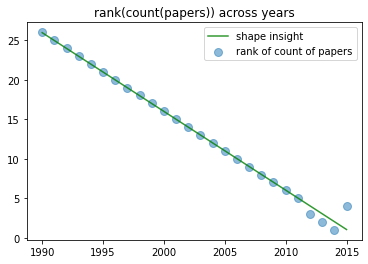

In [358]:
f2 = plt.scatter(df2['year'], df2['rank'], alpha=.5, label='rank of count of papers', s=64)
plt.title('rank(count(papers)) across years')

# Best fit line
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(df2['year'], df2['rank'], 1)
plt.plot(df2['year'], b + m*df2['year'], '-', color='g', alpha=.8, label='shape insight')
plt.legend()
plt.savefig('./figs/papers-2.png', bbox_inches = "tight")

# Powerlaw Point 
s=1.00 Aggregating pct of count over school, maximum point 99.77 stood out using powerlaw test, considering only the subspace {}.

In [335]:
df3 = p_df.groupby('school').agg({'M':'sum'})
df3['pct'] = df3['M'] * 100 / df3['M'].sum()
df3['rank'] = df3['M'].rank(ascending=False, method='first')

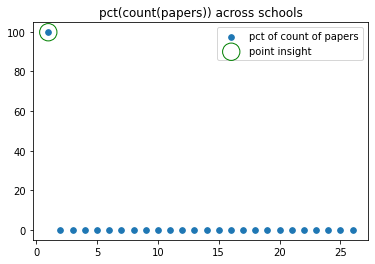

In [336]:
f3 = plt.scatter(df3['rank'], df3['pct'], s=32, label='pct of count of papers')
plt.scatter([1], max(df3['pct']), color="none", edgecolor="g", s=300, label='point insight')
plt.title('pct(count(papers)) across schools')
plt.legend()
plt.savefig('./figs/papers-3.png', bbox_inches = "tight")

# Linear point test
0.23 Aggregating delta_avg of count over year, year {2015} surprisingly high at {39042.33} stood out using linear_point test, considering only the subspace {'venue_type': 0}.

In [337]:
df4 = p_df[p_df['venue_type'] == 0].groupby('year').agg({'M':'sum'}).reset_index(drop=False)
df4['delta_avg'] = df4['M'] - df4['M'].mean()
df4.head()

,year,M,delta_avg
0,1990,10266,-39936.884615
1,1991,11976,-38226.884615
2,1992,13455,-36747.884615
3,1993,15366,-34836.884615
4,1994,16810,-33392.884615


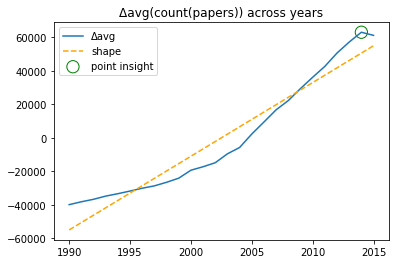

In [339]:
b, m = polyfit(df4['year'], df4['delta_avg'], 1)
f4 = plt.plot(df4['year'], df4['delta_avg'], '-', label='Δavg')
plt.plot(df4['year'], b + m*df4['year'], '--', color='orange', label='shape')
plt.scatter([2014], df4[df4['year'] == 2014]['delta_avg'], color='none', edgecolor='green', s=150, label='point insight')

plt.legend()
plt.title('Δavg(count(papers)) across years')
plt.savefig('./figs/papers-4.png', bbox_inches = "tight")